# <center> Série Temporal </center>
## Professor: Victor Venites
## Data: 12/05/2020
## Aula: 09
## Escola Livre de IA

## Setup do Ambiente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# FiveThirtyEight -> Gráfico com várias séries ao mesmo tempo
# Função Mágica - Colocar comandos/resultados do MatPlot
from datetime import datetime
from pandas import Series # Cuida dos dados no estilo em série
import warnings
warnings.filterwarnings("ignore")

## DataPrep

In [2]:
Base_BitCoin = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv")
Base_BitCoin.head(3)
# Dados puros do Kaggle

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Base_BitCoin.tail(3)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4363454,1587513480,6846.50,6857.45,6846.02,6857.45,7.089168,48533.089069,6846.090966
4363455,1587513540,6854.18,6854.98,6854.18,6854.98,0.012231,83.831604,6854.195090
4363456,1587513600,6850.60,6850.60,6850.60,6850.60,0.014436,98.896906,6850.600000


In [4]:
# Apagar os NaN
Base_BitCoin.fillna(method = "ffill", inplace = True) # Obrigado Raphael
Base_BitCoin.head(3)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [5]:
# Apagar coluna do TimeStamp
Base_BitCoin.index = pd.to_datetime(Base_BitCoin["Timestamp"].astype(int), unit = 's')
Base_BitCoin.drop('Timestamp', axis = 1, inplace = True)
Base_BitCoin.index.rename("DateTime" , inplace = True)
Base_BitCoin.head(3)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
DateTime,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


## Teste dos dados

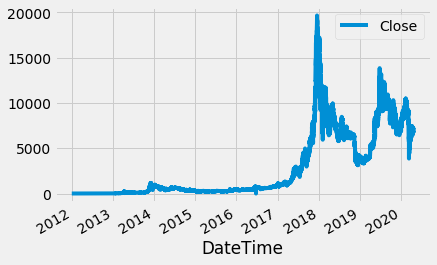

In [6]:
# Para ver os dados historicos
Bit_Coin_Original = pd.DataFrame(Base_BitCoin["Close"].copy())
# DateTime, Close
Bit_Coin_Original.plot()
plt.show()

In [7]:
Bit_Coin = Bit_Coin_Original.loc['2016-01-01':].copy()
Bit_Coin

,Close
DateTime,
2016-01-01 00:00:00,430.89
2016-01-01 00:01:00,430.89
2016-01-01 00:02:00,430.89
2016-01-01 00:03:00,430.89
2016-01-01 00:04:00,431.06
...,...
2020-04-21 23:56:00,6856.35
2020-04-21 23:57:00,6850.89
2020-04-21 23:58:00,6857.45


In [8]:
# Serapar dados das Datas de Atuação - Para Ciclos
Bit_Coin.insert(loc = 0, column = "Ano", value = Bit_Coin.index.year)
Bit_Coin.insert(loc = 1, column = "Mes", value = Bit_Coin.index.month)
Bit_Coin.insert(loc = 2, column = "Dia_do_Mes", value = Bit_Coin.index.day)
## Dia do Ano - Li em um artigo de Mestrado
Bit_Coin.insert(loc = 1, column = "Dia_do_Ano", value = Bit_Coin.index.dayofyear)
## Semana
Bit_Coin.insert(loc = 4, column = "Semana_do_Ano", value = Bit_Coin.index.week)
Bit_Coin.insert(loc = 5, column = "Dia_da_Semana", value = Bit_Coin.index.dayofweek)
### The day of the week with Monday=0, Sunday=6.
Bit_Coin["Dia_da_Semana"] = Bit_Coin["Dia_da_Semana"] + 1
### Segunda = 1 até Domingo = 7
Bit_Coin.insert(loc = 5, column = "Hora_Dia", value = Bit_Coin.index.hour)
Bit_Coin.head(1)

,Ano,Dia_do_Ano,Mes,Dia_do_Mes,Semana_do_Ano,Hora_Dia,Dia_da_Semana,Close
DateTime,,,,,,,,
2016-01-01,2016,1,1,1,53,0,5,430.89


## Análise Exploratória de Dados em Séries Temporais

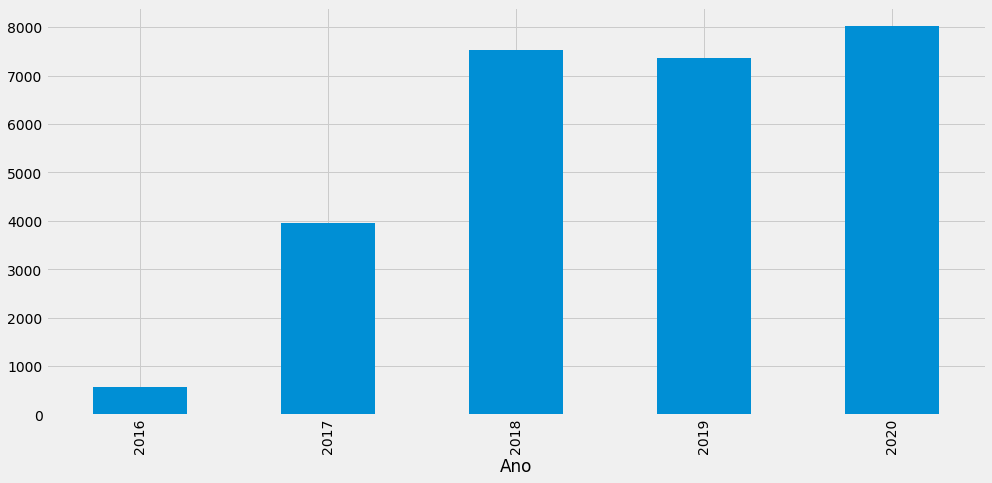

In [10]:
# Se eu quiser comprar por ano, para vender ano que vem? Vice-versa
plt.figure(figsize = (15,7))
Bit_Coin.groupby('Ano')['Close'].mean().plot.bar()

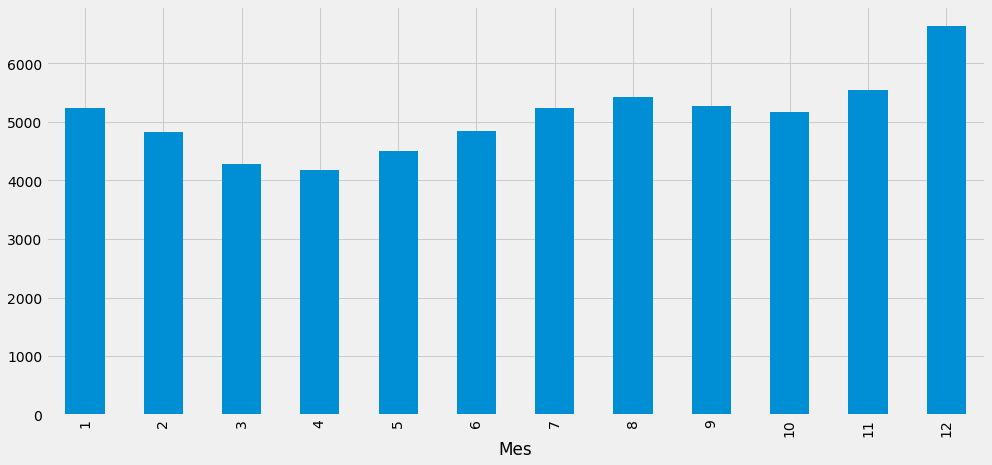

In [11]:
# Se eu quiser comprar por mes, para vender mes que vem? Vice-versa
plt.figure(figsize = (15,7))
# Victor: 
Bit_Coin.groupby('Mes')['Close'].mean().plot.bar()

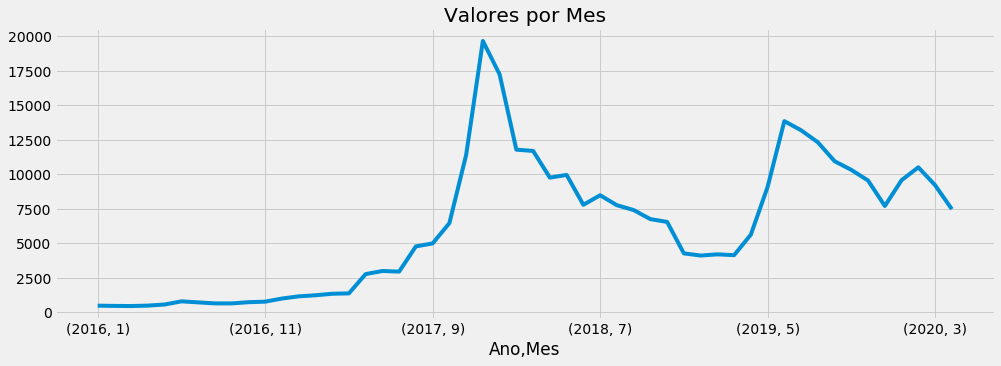

In [12]:
# Suavização Ingenua
Bit_Coin.groupby(['Ano', 'Mes'])['Close'].max().plot(figsize =(15,5), title = "Valores por Mes", fontsize = 14)

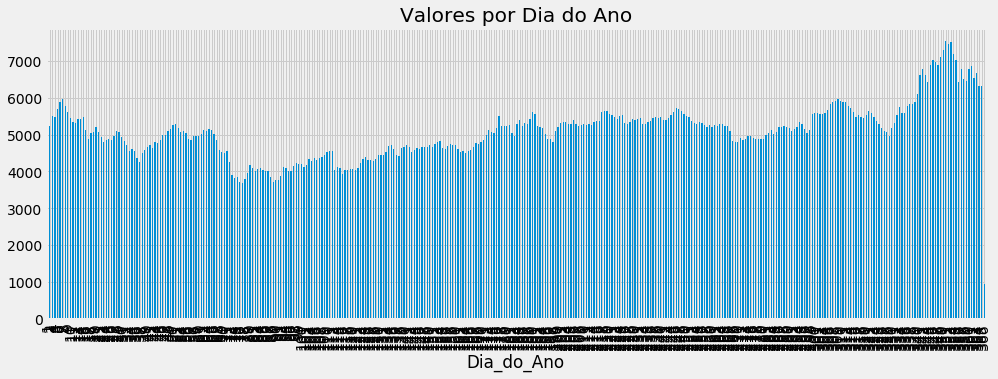

In [13]:
# Se eu quiser comprar por dia do ano, para vender em outro dia? Vice-versa
plt.figure(figsize = (15,7))
Bit_Coin.groupby('Dia_do_Ano')['Close'].mean().plot.bar(figsize =(15,5), title = "Valores por Dia do Ano")
plt.show()

Text(0.5, 1.0, 'Comparação: Ano')

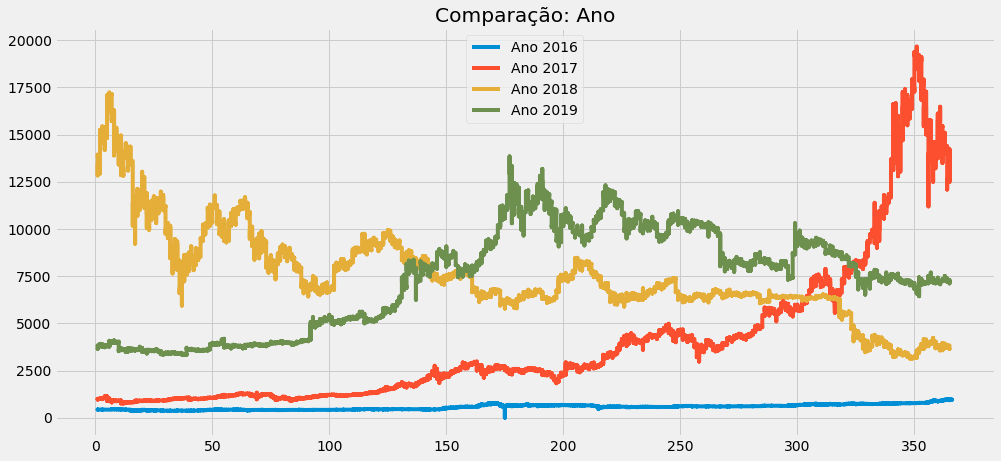

In [16]:
# Vamos pensar
plt.figure(figsize = (15,7))
for i in Bit_Coin["Ano"].unique():
    if i < 2020:
        plt.plot(Bit_Coin[Bit_Coin["Ano"] == i]["Dia_do_Ano"]\
             , Bit_Coin[Bit_Coin["Ano"] == i]["Close"], label = 'Ano ' + str(i))
plt.legend(loc = 'best')
plt.title('Comparação: Ano' )
plt.show()

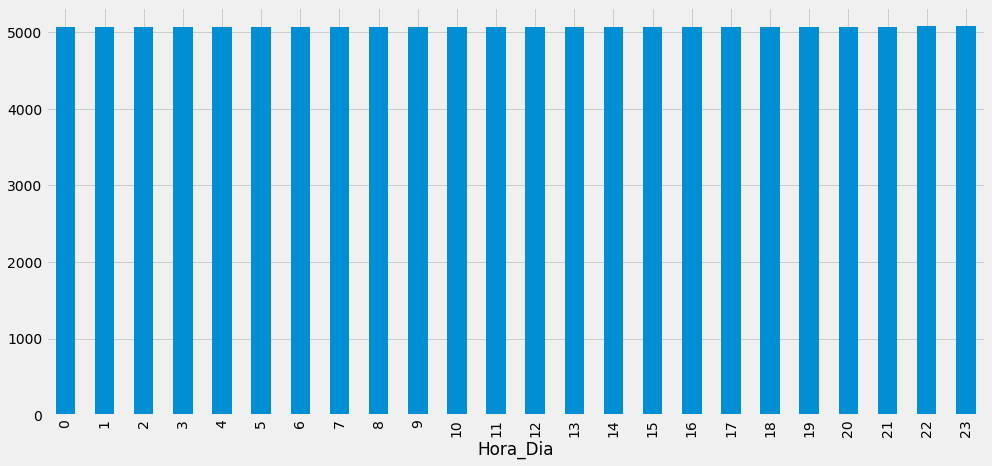

In [22]:
# Se eu quiser comprar hoje, para vender no mesmo dia? Vice-versa
plt.figure(figsize = (15, 7))
Bit_Coin.groupby('Hora_Dia')['Close'].max().plot.bar()
plt.show()

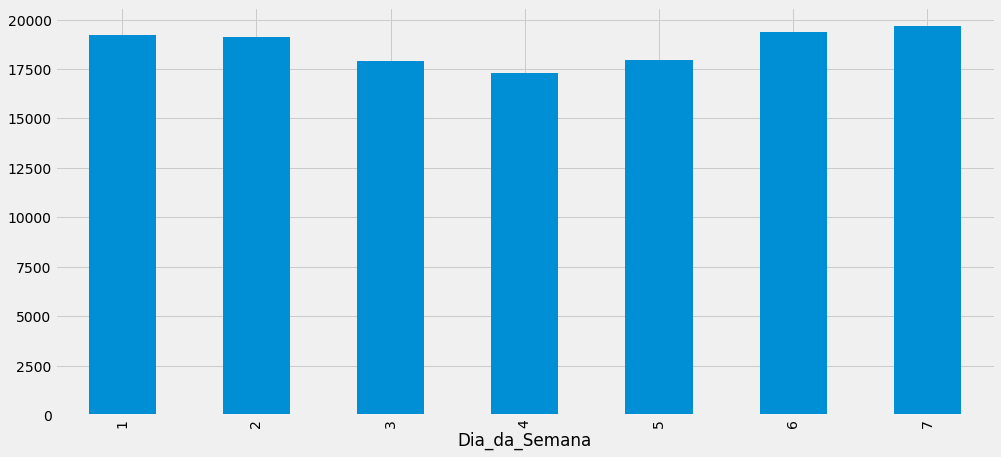

In [24]:
# Não consigo acompanhar isso todos dias da semana!
# Se eu quiser comprar por semana, para vender nesta semana? Vice-versa
plt.figure(figsize = (15,7))
Bit_Coin.groupby('Dia_da_Semana') ['Close'].max().plot.bar()
# Sexta e sábado teve valor maior

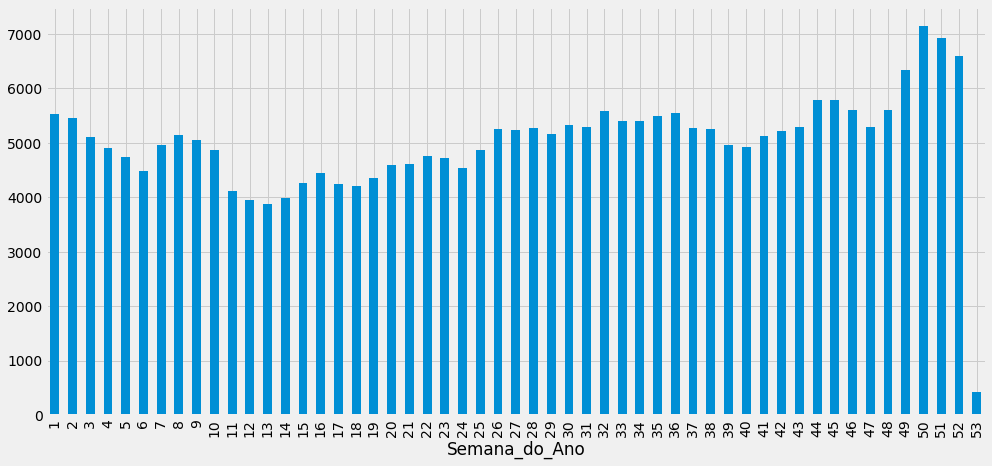

In [25]:
plt.figure(figsize = (15,7))
Bit_Coin.groupby('Semana_do_Ano') ['Close'].mean().plot.bar()

In [27]:
## Outra forma por # Resample -> ReAmostrar
#Hora
Hora = Bit_Coin.resample('H').mean().copy()

#Diario
Diario = Bit_Coin.resample('D').mean().copy()

#Semanal
Semanal = Bit_Coin.resample('W').mean().copy()

#Mensal
Mensal = Bit_Coin.resample('M').mean().copy()

In [32]:
Mensal.tail()

,Ano,Dia_do_Ano,Mes,Dia_do_Mes,Semana_do_Ano,Hora_Dia,Dia_da_Semana,Close
DateTime,,,,,,,,
2019-12-31,2019.0,350.000000,12.0,16.000000,47.225806,11.50000,3.935484,7240.869919
2020-01-31,2020.0,16.000000,1.0,16.000000,3.000000,11.50000,4.000000,8321.145863
2020-02-29,2020.0,46.000000,2.0,15.000000,7.275862,11.50000,4.068966,9646.313330
2020-03-31,2020.0,76.000000,3.0,16.000000,11.580645,11.50000,3.935484,6929.101725
2020-04-30,2020.0,102.000364,4.0,11.000364,15.285771,11.49962,3.999967,6946.996911


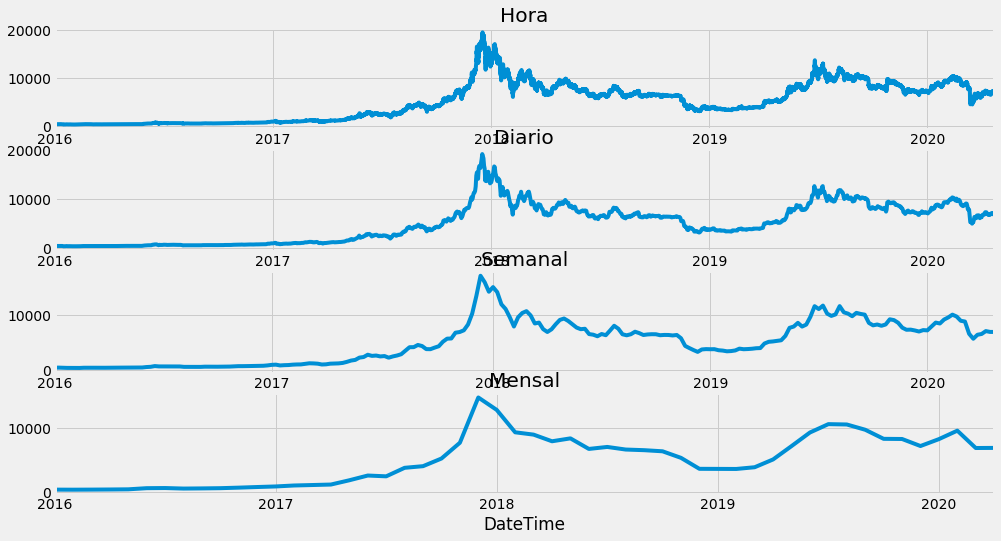

In [35]:
fig,axs = plt.subplots(4,1)
# Comparação temporal
Hora.Close.plot(figsize = (15,8), title = "Hora", fontsize = 14, ax = axs[0])
Diario.Close.plot(figsize = (15,8), title = "Diario", fontsize = 14, ax = axs[1])
Semanal.Close.plot(figsize = (15,8), title = "Semanal", fontsize = 14, ax = axs[2])
Mensal.Close.plot(figsize = (15,8), title = "Mensal", fontsize = 14, ax = axs[3])
# Não recomendo deixa o nome da coluna assim, dificulta produtizar depois
#Smothing
plt.show()

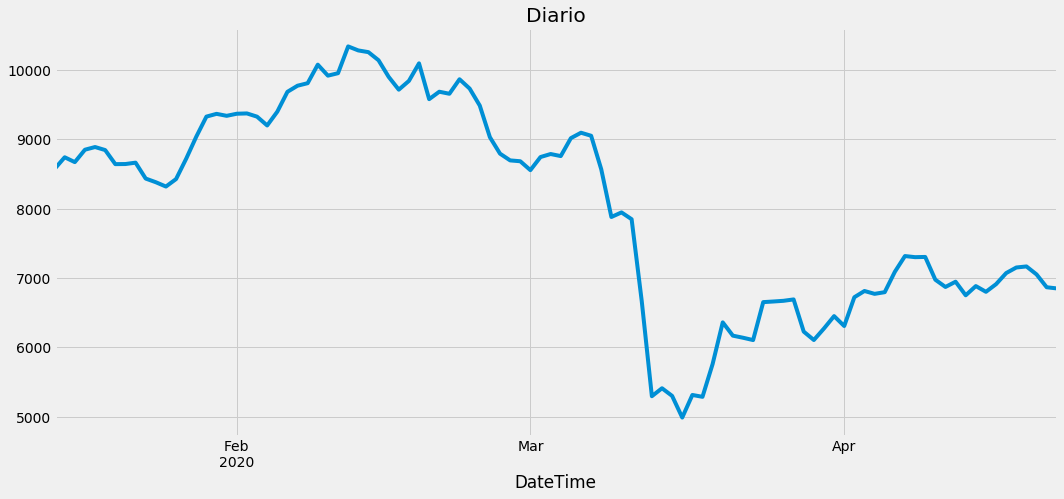

In [43]:
df_TheViniant = Diario.iloc[-100:, :].copy()
df_TheViniant.Close.plot(figsize = (16, 7), title = "Diario", fontsize = 14)
plt.show()

In [44]:
#Convertendo dados para média por dia
train = Bit_Coin.resample('D').mean()
# Garantir que não ocorra NaN na reamostragem
train.head(3)

,Ano,Dia_do_Ano,Mes,Dia_do_Mes,Semana_do_Ano,Hora_Dia,Dia_da_Semana,Close
DateTime,,,,,,,,
2016-01-01,2016.0,1.0,1.0,1.0,53.0,11.5,5.0,432.736833
2016-01-02,2016.0,2.0,1.0,2.0,53.0,11.5,6.0,433.124590
2016-01-03,2016.0,3.0,1.0,3.0,53.0,11.5,7.0,429.407208


In [45]:
train.tail(3)

,Ano,Dia_do_Ano,Mes,Dia_do_Mes,Semana_do_Ano,Hora_Dia,Dia_da_Semana,Close
DateTime,,,,,,,,
2020-04-20,2020.0,111.0,4.0,20.0,17.0,11.5,1.0,7052.486319
2020-04-21,2020.0,112.0,4.0,21.0,17.0,11.5,2.0,6867.569778
2020-04-22,2020.0,113.0,4.0,22.0,17.0,0.0,3.0,6850.600000


In [49]:
if (len(train) != train["Close"].count()):
    train.fillna(method="ffill", inplace=True)
    print("Resample resultou trechos com NaN, feita substiuicao pela ultimo valor registrado em ordem temporal.")
    print("Exemplo: DE[2.79, 3.15, NaN, 5.0, NaN, NaN, 1.56]")
    print(", PARA[2.79, 3.15, 3.15, 5.0, 5.0, 5.0, 1.56]")
train.to_excel("BitCoin_Index_Unique.xlsx")
train.head(2)

,Ano,Dia_do_Ano,Mes,Dia_do_Mes,Semana_do_Ano,Hora_Dia,Dia_da_Semana,Close
DateTime,,,,,,,,
2016-01-01,2016.0,1.0,1.0,1.0,53.0,11.5,5.0,432.736833
2016-01-02,2016.0,2.0,1.0,2.0,53.0,11.5,6.0,433.124590


## Iniciando Análises e Hipóteses
***Divide data into training and validation***

In [50]:
Train = train.loc['2016-01-01':'2018-12-31'].copy() # Treino
valid = train.loc['2019-01-01':'2019-12-31'].copy() # Validação
test = train.loc['2020-01-01':].copy() # Teste

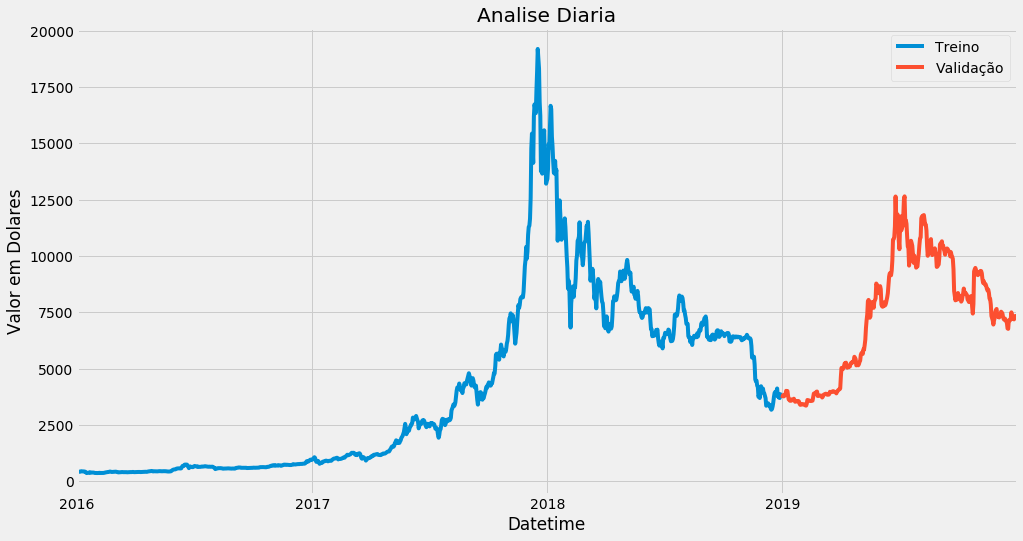

In [51]:
Train.Close.plot(figsize = (15,8), title = 'Analise Diaria', fontsize =14, label = 'Treino')
valid.Close.plot(figsize = (15,8), title = 'Analise Diaria', fontsize =14, label = 'Validação')
plt.xlabel('Datetime')
plt.ylabel('Valor em Dolares')
plt.legend(loc = 'best')
# Muita coisa?

# ** Naive Approach** - Aproximação Ingênua

Text(0.5, 1.0, 'Naive Forecast')

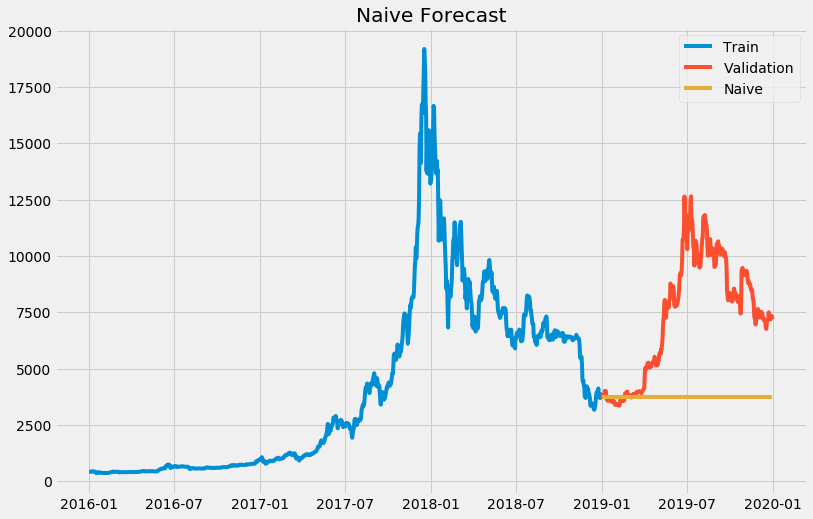

In [52]:
dd = np.asarray(Train['Close'])
y_hat = valid.copy()
y_hat['naive'] = dd[-1] # Considera o ultimo dado
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['Close'],label = 'Train')
plt.plot(valid.index, valid['Close'], label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.title('Naive Forecast')
# Forecast = Previsao

## RMS - RootMeanSquare - Raiz Quadrada Média
*** Calculate RMS Error for Naive Approach***
> Média da Distância Euclidiana de todos os pontos

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.Close, y_hat.naive)) # Obrigado Frederico de Portugal
rmse

4461.89546237443

## Média Móvel

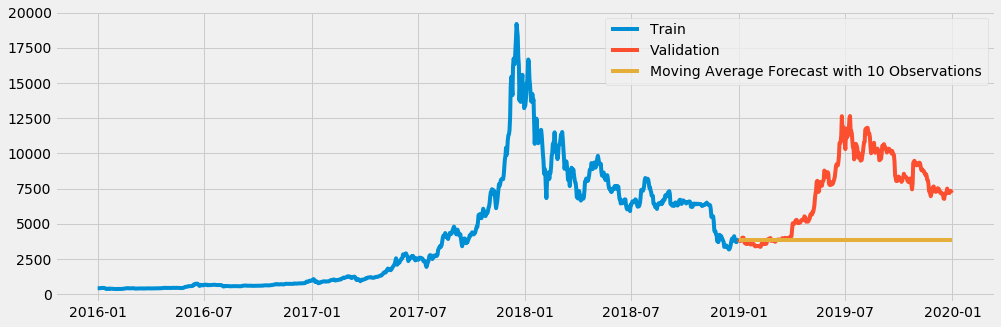

In [55]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Close'].rolling(10).mean().iloc[-1]
# Pega os Últimos 10 para média móvel
plt.figure(figsize = (15,5))
plt.plot(Train['Close'], label = 'Train')
plt.plot(valid['Close'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = 'Moving Average Forecast with 10 Observations')
plt.legend(loc = 'best')
plt.show()

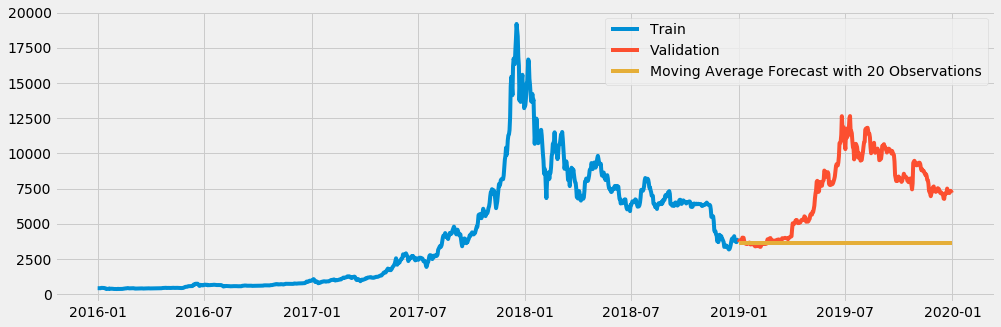

In [56]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Close'].rolling(20).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Close'], label = 'Train')
plt.plot(valid['Close'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'],label = 'Moving Average Forecast with 20 Observations')
plt.legend(loc = 'best')
plt.show()

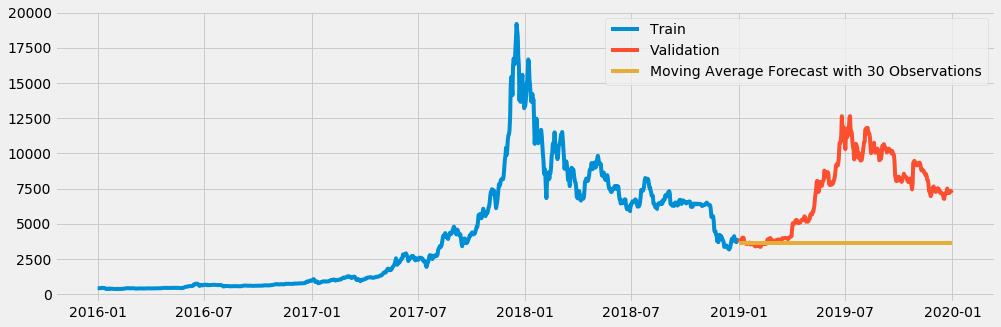

In [58]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Close'].rolling(30).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Close'], label = 'Train')
plt.plot(valid['Close'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'],label = 'Moving Average Forecast with 30 Observations')
plt.legend(loc = 'best')
plt.show()

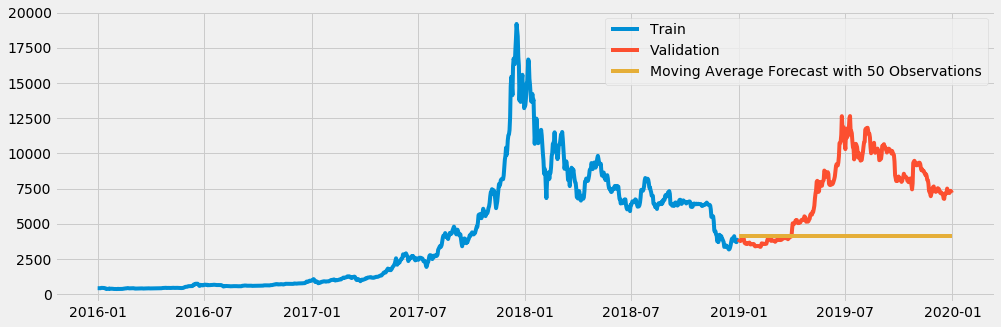

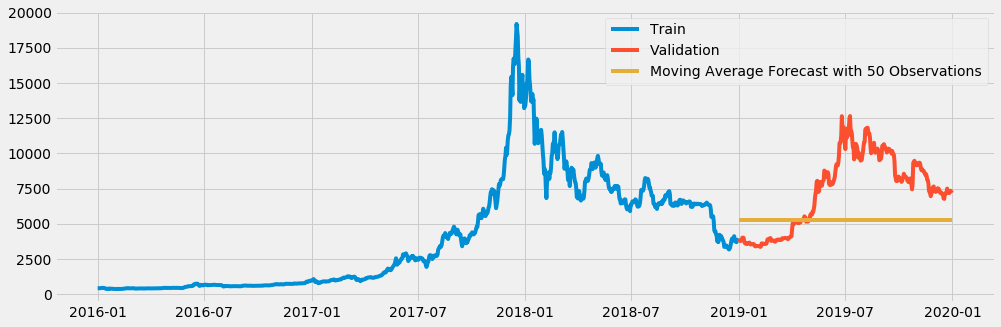

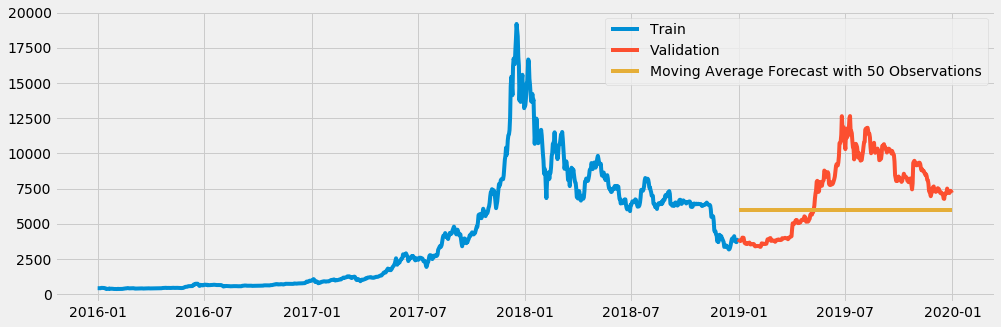

In [59]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast']= Train['Close'].rolling(50).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Close'], label = 'Train')
plt.plot(valid['Close'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast']= Train['Close'].rolling(100).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Close'], label = 'Train')
plt.plot(valid['Close'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast']= Train['Close'].rolling(200).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Close'], label = 'Train')
plt.plot(valid['Close'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()

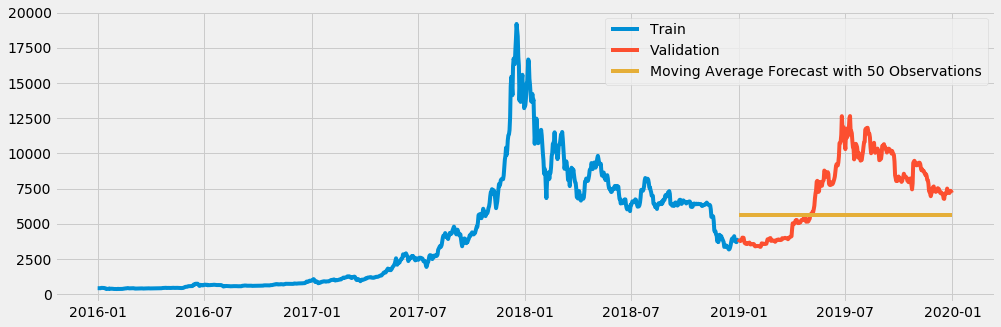

In [60]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Close'].rolling(141).mean().iloc[-1]
plt.figure(figsize = (15, 5))
plt.plot(Train['Close'], label = 'Train')
plt.plot(valid['Close'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()

In [61]:
rmse = sqrt(mean_squared_error(valid.Close, y_hat_avg['moving_average_forecast'])) # Obrigado Frederico de Portugal
rmse

3142.7864135448435

***RMS Error for Moving Average***

In [65]:
rmse = []
# Mostra as distancias de erro para medias moveis de 10 em 10 até t-100
for i in range(2, round(len(Train) / 2), 1): # len = lenght - Tamanho
    y_hat_avg = valid.copy()
    y_hat_avg['moving_average_forecast'] = Train['Close'].rolling(i).mean().iloc[-1]
    rmse.append([i, sqrt(mean_squared_error(valid['Close'], y_hat_avg['moving_average_forecast']))])

In [70]:
df_rmse = pd.DataFrame(rmse, columns = ["Qtd_Dias", "RMSE"])
df_rmse.head(2)

,Qtd_Dias,RMSE
0,2,4449.549890
1,3,4422.550063


In [76]:
df_rmse[df_rmse["RMSE"] == df_rmse["RMSE"].min()]

,Qtd_Dias,RMSE
355,357,2643.053143


## Holt's Winter Method

- https://towardsdatascience.com/econometric-approach-to-time-series-analysis-seasonal-arima-in-python-28f5782ee23
- https://supchains.com/article/holt-winters-forecast-with-multiplicative-seasonality-python/

In [77]:
# Bibliotecas Padrão
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

## HyperParâmetros

- alpha -->  Suavização do Nível(Level)
- beta  -->  Suavização da Tendencia(Trend)
- gamma -->  Suvização da Sazonalidade(Seasonal)

In [196]:
## Variáveis do Modelo:
#- Definir valor inicial
Dias_Resample = 1
# Variáveis de Suavização
alpha = 0.3
beta = 0.3
gamma = 0.3
# Sazonalidade dos Períodos da Série Temporal
periodo_sazonal = 365
# Tempos a serem previstos no Teste
Tempos_Forecast = 1

## Preparação de DataFrame

In [197]:
df = train.loc[:, ["Close"]].copy()
df = df.resample(str(Dias_Resample) + 'D').mean()
df.describe()

,Close
count,225.000000
mean,5073.388288
std,3859.115176
min,374.963739
25%,998.570436
50%,5028.585443
75%,8086.612086
max,17832.724974


In [198]:
Holt_Winter = pd.DataFrame(df["Close"].values, columns = ["Close"])
Holt_Winter.head()

,Close
0,434.126529
1,443.369060
2,389.608151
3,392.056733
4,374.963739


# Indices Iniciais
- Usa-se geralmente um calculo relacionado aos 3 primeiros tempos
- Chutes iniciais para Level, Tendencia e Sazonalidade

In [199]:
# Level
lista_vazia = np.empty(len(Holt_Winter))
lista_vazia = lista_vazia * np.NaN
Holt_Winter["Level"] = lista_vazia
Holt_Winter.loc[periodo_sazonal - 1 , "Level"] = np.mean(Holt_Winter["Close"][:periodo_sazonal])
Holt_Winter.head(2)

,Close,Level
0,434.126529,NaN
1,443.369060,NaN


In [200]:
Holt_Winter["Trend"] = lista_vazia
# Posso melhorar a tendencia depois, com Smoothing ou LinearRegression
Holt_Winter.loc[periodo_sazonal - 1, "Trend"] = np.mean(Holt_Winter["Close"][:periodo_sazonal])
Holt_Winter["Seasonal"] = lista_vazia
Holt_Winter.loc[:periodo_sazonal - 1, "Seasonal"] = round(Holt_Winter["Close"] / Holt_Winter.loc[periodo_sazonal - 1, "Level"], 2)
Holt_Winter["Forecast"] = lista_vazia
Holt_Winter.head(2)

,Close,Level,Trend,Seasonal,Forecast
0,434.126529,NaN,NaN,0.76,NaN
1,443.369060,NaN,NaN,0.78,NaN


# Treinando com os períodos de 4 à 6, ou 7 a 14, depende da sua sazonalidade
- https://www.codecogs.com/latex/eqneditor.php?lang=pt-br

- Se Sazonal for um fator multilicador:
$$\Huge L_t = \alpha (\frac{D_t}{S_{t - s}}) + (1 - \alpha)(L_{t - 1} + T_{t-1}) $$

- Se Sazonal for uma diferença sem importância de Tendência e Média:
$$\Huge L_t = \alpha (D_t - S_{t - s}) + (1 - \alpha)(L_{t - 1} + T_{t-1}) $$

In [201]:
def Level(DataFrame, periodo, linha, alpha):
    Level_Parte_Um = alpha * (DataFrame["Close"] / DataFrame["Seasonal"].shift(periods = periodo))
    parcial = Level_Parte_Um + (1 - alpha)*(DataFrame["Level"].shift(periods = 1) + DataFrame["Trend"].shift(periods = 1))
    return parcial.iloc[linha]

$$\Huge T_t = \beta (L_t - L_{t - 1}) + (1-\beta)T_{t-1}$$

In [202]:
def Trend(DataFrame, linha, beta):
    Trend_Parte_Um = beta * (DataFrame["Level"] - DataFrame["Level"].shift(periods = 1))
    parcial = Trend_Parte_Um + (1 - beta)*DataFrame["Trend"].shift(periods = 1)
    return parcial.iloc[linha]

$$\Huge S_t = \gamma (\frac{D_t}{L_t}) + (1 - \gamma)S_{t-s}$$

$$\Huge S_t = \gamma (D_t - L_t) + (1 - \gamma)S_{t-s}$$

In [203]:
def Seasonal(DataFrame, periodo, linha, gamma):
    parcial = gamma*(DataFrame["Close"] / DataFrame["Level"]) + (1 - gamma)*DataFrame["Seasonal"].shift(periods = periodo)
    return parcial.iloc[linha]

# Previsão

$$ \Huge F_{t+m} = (L_t + mT_t)*S_{t+m-s}$$

In [204]:
# m --->>> dias de previsão a frente
def Forecast(DataFrame, periodo, linha, previsao):
    # Previsao são os dias de um futuro esquecido
    parcial = (DataFrame["Level"] + previsao*DataFrame["Trend"]) * DataFrame["Seasonal"].shift(periods = periodo - previsao)
    return parcial.iloc[linha]

# Tudo Junto

In [205]:
for x in range(periodo_sazonal, len(Holt_Winter)):
    Holt_Winter.loc[x, "Level"] = Level(Holt_Winter.loc[:x], periodo_sazonal, x, alpha)
    Holt_Winter.loc[x, "Trend"] = Trend(Holt_Winter.loc[:x], x, beta)
    Holt_Winter.loc[x, "Seasonal"] = Seasonal(Holt_Winter.loc[:x], periodo_sazonal, x, gamma)
    Holt_Winter.loc[x, "Forecast"] = Forecast(Holt_Winter.loc[:x], periodo_sazonal, x - 1, Tempos_Forecast)
Holt_Winter.loc[Holt_Winter["Forecast"] < 0, "Forecast"] = 0
Holt_Winter.head(2)

,Close,Level,Trend,Seasonal,Forecast
0,434.126529,NaN,NaN,0.76,NaN
1,443.369060,NaN,NaN,0.78,NaN


In [206]:
Holt_Winter.tail(2)

,Close,Level,Trend,Seasonal,Forecast
223,6877.932315,10957.003686,-558.411298,0.656095,7584.220463
224,7027.258220,10306.035425,-586.178387,0.692075,7106.012936


## Medindo os Resultados

In [207]:
# ### MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true) + 1
    y_pred = np.array(y_pred) + 1
    # Add +1 para evitar divisão por zero
    return np.mean(np.abs((y_true - y_pred) / y_true))
# Quanto menor, melhor

In [208]:
# ## Bias
def vies_bias(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(y_true - y_pred)

In [209]:
# ### Erros
def resultados(y_true, y_pred):
    Bias = round(vies_bias(y_true, y_pred), 5)
    EVS = round(metrics.explained_variance_score(y_true, y_pred), 5)
    MAE = round(metrics.mean_absolute_error(y_true, y_pred), 5)
    RMSE = round((metrics.mean_squared_error(y_true, y_pred)) ** (1/2), 5)
    R2 = round(metrics.r2_score(y_true, y_pred), 5)
    MAPE = round(mean_absolute_percentage_error(y_true, y_pred), 5)
    
    return(Bias, EVS, MAE, RMSE, R2, MAPE)

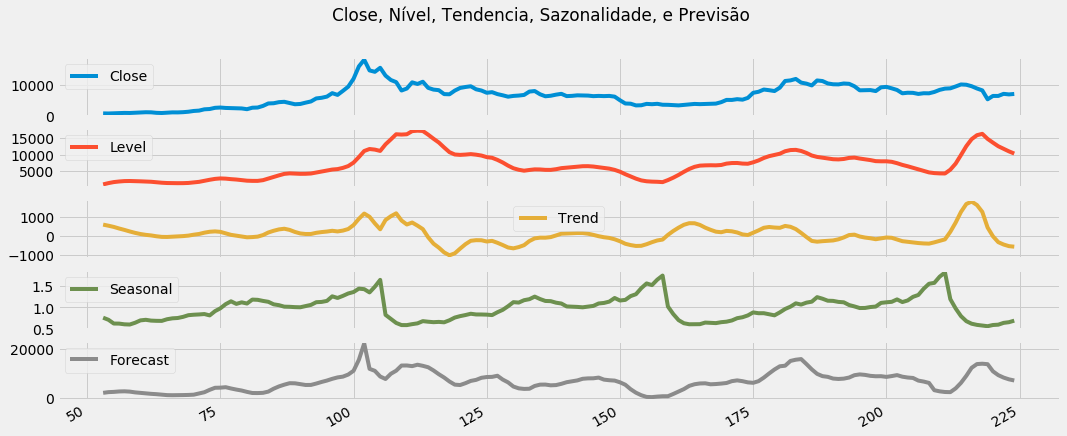

In [210]:
Resultados = Holt_Winter.dropna().copy()
#Resultados.set_index("Month", inplace = True)
Resultados.plot(subplots = True, figsize = [16, 7], title = "Close, Nível, Tendencia, Sazonalidade, e Previsão")
plt.show()

<Figure size 1152x648 with 0 Axes>

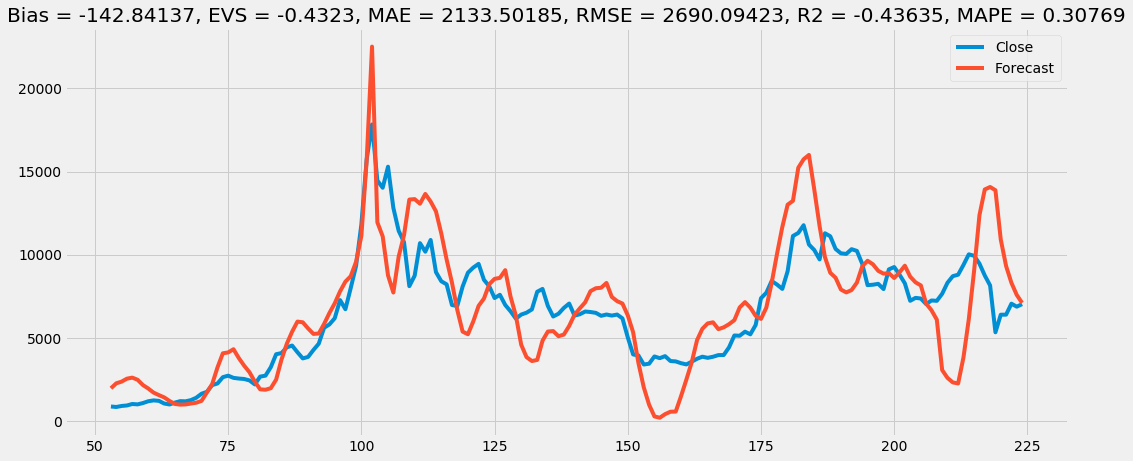

In [211]:
plt.figure( figsize = (16, 9))
Resultados[["Close", "Forecast"]].plot(figsize = [16, 7], title = "Treino de Demanda")
Bias, EVS, MAE, RMSE, R2, MAPE = resultados(Resultados["Close"][periodo_sazonal:], Resultados["Forecast"][periodo_sazonal:])
plt.title(f"Bias = {Bias}, EVS = {EVS}, MAE = {MAE}, RMSE = {RMSE}, R2 = {R2}, MAPE = {MAPE}")
plt.show()

Bias, EVS, MAE, MSE, R2, MAPE
(64.54715, -6.51906, 2466.20177, 3367.04571, -6.52182, 0.31297)


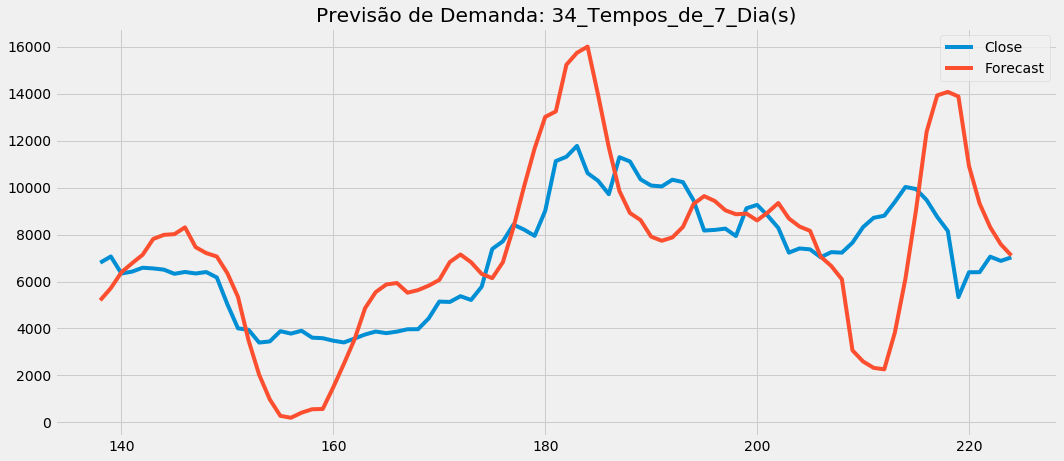

In [212]:
Tempo_Previsao = round(len(Resultados) * 0.8)
Previsao_Tempos_Periodos = str(len(Resultados) - Tempo_Previsao) + "_Tempos_de_" + str(Dias_Resample) + "_Dia(s)"
Resultados.loc[Tempo_Previsao:, ["Close", "Forecast"]].plot(figsize = [16, 7]
                                                                           , title = "Previsão de Demanda: " + Previsao_Tempos_Periodos)
print("Bias, EVS, MAE, MSE, R2, MAPE")
print(resultados(Resultados["Close"][Tempo_Previsao:]
                                       , Resultados["Forecast"][Tempo_Previsao:]))
plt.savefig("HoltWinter_Previsao_" + Previsao_Tempos_Periodos + ".png")
plt.show()